## CIFAR-10 Multiple Classes

The CIFAR-10 dataset which consist of 10 different image types

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from keras.datasets import cifar10

(x_train,y_train),(x_text,y_text) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

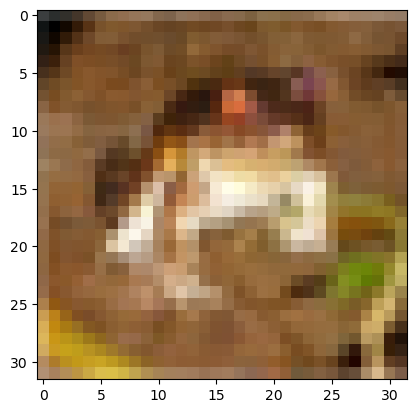

In [7]:
# FROG
plt.imshow(x_train[0])

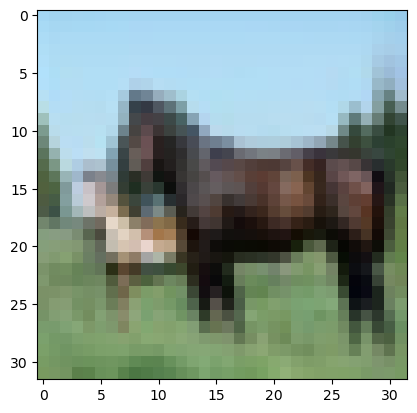

In [9]:
plt.imshow(x_train[12])

## PreProcessing


In [29]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
x_train[0].shape

(32, 32, 3)

In [31]:
x_train.max()

255

In [32]:
x_train = x_train/255
x_text = x_text/255

In [33]:
x_train.shape

(50000, 32, 32, 3)

In [34]:
x_text.shape

(10000, 32, 32, 3)

## Labels

In [35]:
from keras.utils import to_categorical

In [36]:
y_train.shape

(50000, 1)

In [45]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [44]:
y_train[0]

array([6], dtype=uint8)

In [41]:
y_cat_train = to_categorical(y_train,10)

In [42]:
y_cat_train.shape

(50000, 10)

In [46]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [47]:
y_cat_test = to_categorical(y_text,10)

## Building the Model

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [56]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [58]:
from keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [60]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_text,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5425 - accuracy: 0.4482 - val_loss: 1.4421 - val_accuracy: 0.4692
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1801 - accuracy: 0.5866 - val_loss: 1.2162 - val_accuracy: 0.5838
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0282 - accuracy: 0.6435 - val_loss: 1.0465 - val_accuracy: 0.6349
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9215 - accuracy: 0.6826 - val_loss: 1.0147 - val_accuracy: 0.6557
Epoch 5/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8406 - accuracy: 0.7107 - val_loss: 1.0723 - val_accuracy: 0.6506
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7725 - accuracy: 0.7356 - val_loss: 1.0614 - val_accuracy: 0.6643


## Evaluate the Model

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.542503,0.44822,1.442092,0.4692
1,1.180115,0.58658,1.216199,0.5838
2,1.028188,0.64346,1.046478,0.6349
3,0.921525,0.68260,1.014724,0.6557
4,0.840595,0.71074,1.072275,0.6506


<AxesSubplot:>

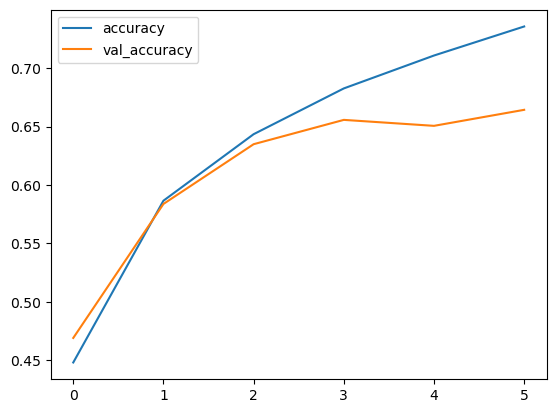

In [64]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

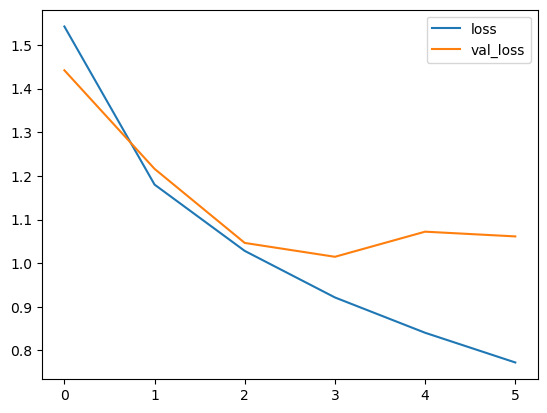

In [65]:
losses[['loss','val_loss']].plot()

In [69]:
print(model.metrics_names)
print(model.evaluate(x_text,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0614253282546997, 0.6643000245094299]


In [71]:
from sklearn.metrics import classification_report,confusion_matrix

preds_prob = model.predict(x_text)
predictions = np.argmax(preds_prob,axis=1)

313/313 [==============================] - 1s 4ms/step


In [73]:
print(classification_report(y_text,predictions))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1000
           1       0.77      0.79      0.78      1000
           2       0.57      0.58      0.57      1000
           3       0.56      0.34      0.43      1000
           4       0.75      0.42      0.54      1000
           5       0.52      0.63      0.57      1000
           6       0.73      0.74      0.74      1000
           7       0.66      0.78      0.71      1000
           8       0.75      0.82      0.78      1000
           9       0.70      0.79      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [74]:
confusion_matrix(y_text,predictions)

array([[761,  28,  48,   4,   9,   9,   7,   9,  85,  40],
       [ 30, 790,  11,   4,   1,   3,   7,   6,  41, 107],
       [ 83,   9, 580,  31,  43, 102,  68,  45,  21,  18],
       [ 45,  17,  96, 344,  33, 259,  75,  72,  25,  34],
       [ 49,  16, 118,  53, 418,  72,  81, 150,  26,  17],
       [ 35,  12,  65,  97,  23, 626,  31,  75,  15,  21],
       [ 20,  30,  47,  45,  20,  37, 745,  21,   8,  27],
       [ 43,   9,  33,  15,   9,  68,  10, 775,   4,  34],
       [ 78,  31,  11,  14,   1,   9,   3,   4, 818,  31],
       [ 43,  81,  13,   6,   1,   9,   0,  11,  50, 786]], dtype=int64)

## Predicting a given image

In [77]:
my_image = x_text[16]

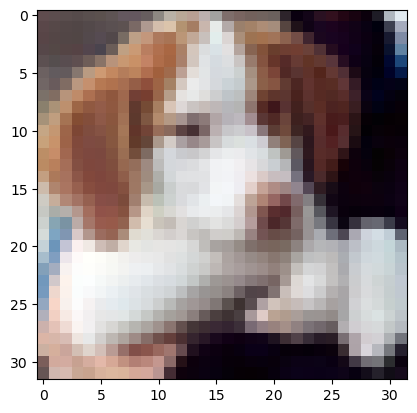

In [78]:
plt.imshow(my_image)

In [81]:
# SHAPE --> (num_images,width,height,color_channels)
preds_prob=model.predict(my_image.reshape(1,32,32,3))
predictions = np.argmax(preds_prob,axis=1)

1/1 [==============================] - 0s 19ms/step


In [82]:
predictions # 5 is dog

array([5], dtype=int64)

In [83]:
# https://www.cs.toronto.edu/~kriz/cifar.html